In [1]:
# author: Francisco J. Guerrero-Gonzalez (f.guerrero@tum.de)
# reviewer: Francisco J. Guerrero-Gonzalez
# version: 1.0.0

Copyright 2023, Professorship of Lunar and Planetary Exploration, Technical University of Munich.

Permission is hereby granted, free of charge, to any person obtaining a copy of this model and associated documentation files, without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the models, and to permit persons to whom the model is furnished to do so, subject to the following conditions:

1. The above copyright notice and this permission notice shall be included in all copies or substantial portions of the model, as well as reference to the author(s) listed above. Scientific publications which use this model shall cite the [ISRULib documentation site](https://wiki.tum.de/display/lpe/ISRULib) attributing credit to the named authors in the documentation.

2. The model is provided without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose, and non-infringement. In no event shall the authors or copyright holders be liable for any claim, damages, or other liability, whether in an action of contract, tort, or otherwise, arising from, out of, or in connection with the model or the use or other dealings in the model.

# Lapple Cyclone

In [2]:
# Python Libraries
import numpy as np
from IPython import display

**Model Description**

A cyclone separator is capable of separating solid particles of a gas flow through the centrifugal force that is exerted on the particles. The polluted fluid goes on a spiral movement and the solid particles are launched in the direction of cyclone walls, where they slide and are collected. Particles move in the direction of the walls due to its own inertia (de Paula et al., 2019). 

The most common configuration for gas cleaning is the reverse flow with tangential entrance (see Figure below). Although there are multiple families of cyclones, the Lapple cyclone is considered of general purpose and will be used in this model.

Mantovani & Townsend (2013) recommends placing at least two cyclones in series to increase their efficiency.

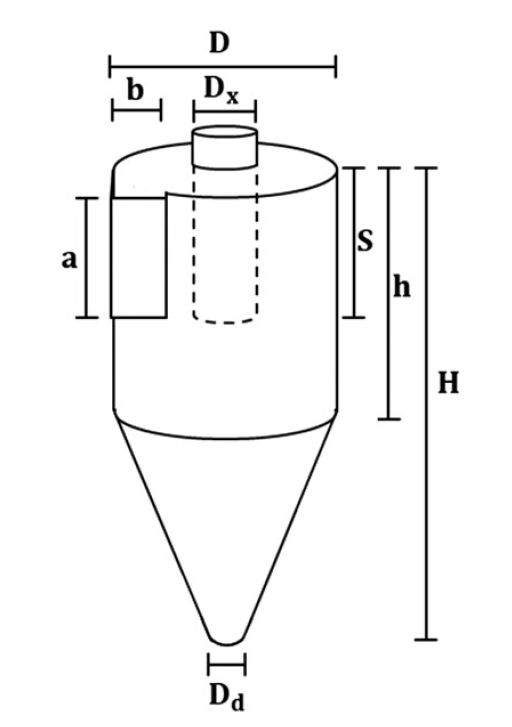

In [3]:
# Include here a descriptive figure of the component (model)
display.Image("figs/Lapple_Cyclone.png")

**Model Assumptions, Simplifications and future Improvements**

The model represents a Lapple cyclone based on the work of de Paula et al. (2019). The removal efficiency of 2 cyclones placed in series is considered to be 100%. The model only returns the hardware mass, assuming 5 mm thickness Inconel as material.  

Future improvements could include:
- Exploring other cyclone designs such as Swift or Stairmand (de Paula et al., 2019).
- Linking the dust removal efficiency with the number of cyclones placed in series.
- Calculating the material thickness based on the volumetric gas glow entering the cyclone.

## 1. Inputs

In [4]:
n_cyclones = 2 # - | Number of cyclones in series
V_dot = 0.1 # m3/s | Volumetric gas flow entering the cyclone

## 2. Constants

In [5]:
pi = np.pi # -

R_cyclone = 1.90556 # m/s | Project constant for a Lapple cyclone (de Paula et al., 2019)
# Other project constant R can be selected for Swift or Stairmand cyclones

kH = 4 # - | Geometric relation between cyclone total height and diameter (de Paula et al., 2019)
kh = 2 # - | Geometric relation between cyclone height of cylindrical section and diameter (de Paula et al., 2019)

t_cyclone = 0.002 # m | Cyclone wall thickness. Rough estimation
rhoInconel = 8190 # kg/m3 | Inconel density under standard conditions. Obtained from the internet

## 3. Model Body

In [6]:
D = np.sqrt(V_dot/R_cyclone) # m | Cyclone diameter of cylindrical section (de Paula et al., 2019)
r = D/2 # m | Cyclone radius of cylindrical section
H = kH*D # m | Cyclone total height (de Paula et al., 2019)
h = kh*D # m | Cyclone height of cylindrical section (de Paula et al., 2019)

# The mass is estimated calculating the volume of a cylinder + cone and considering them hollow with a thichness t_cyclone
VCylinder = 2*pi*t_cyclone*(r + t_cyclone)**2 + h*pi*((r+t_cyclone)**2 - r**2) # m3 | Cylinder hollow volume
MCylinder = VCylinder*rhoInconel # kg | Cylinder mass
VCone = (1/3)*pi*(((H-h)+2*t_cyclone)*(r+t_cyclone)**2 - (H-h)*r**2) # m3 | Cone hollow volume
MCone = VCone*rhoInconel # kg | Cone mass

cyclone_mass = n_cyclones*(MCone + MCylinder) # kg | 2 cyclones in series

## 4. Outputs

In [7]:
print("Mass: %.2f kg"%(cyclone_mass))

Mass: 46.60 kg


## References

A.C. de Paula, J.R. Henriquez, F.A. Figueiredo, Dimensioning a cyclone separator for circulating fluidized bed gasifier: Validation of a procedure,*Heat Transf. Eng. 41 (15–16) (2019) 1305–1314, http://dx.doi.org/10.1080/01457632.2019.1628505

J.G. Mantovani, I.I. Townsend, Planetary Regolith Delivery Systems for ISRU, Journal of Aerospace Engineering 26(1) (2013) 169–175, http://dx.doi.org/10.1061/(asce)as.1943-5525.0000248